# Telecom Customer Churn Prediction

**Predicting customer churn in telecommunications using machine learning**

## Overview

An end-to-end machine learning solution that predicts customer churn in the telecommunications industry. Customer retention is critical as acquiring new customers costs 5-25 times more than retention.

**What This Does:**
- Complete ML pipeline: data cleaning → feature engineering → model training → evaluation
- Handles class imbalance using SMOTE technique
- Random Forest classifier with regularization to prevent overfitting
- Comprehensive metrics and visualizations for business insights
- Feature importance analysis to identify key churn drivers

**Tech Stack:**
- Python 3.7+, Pandas, NumPy
- Scikit-learn, imbalanced-learn
- Matplotlib, Seaborn

## Dataset

**Source:** Telco Customer Churn Dataset

**Size:** 7,043 customers with 33 features

**What's Included:**
- **Customer Demographics**: Gender, age, partner/dependent status
- **Location Data**: State, city, zip code, latitude/longitude
- **Account Details**: Tenure (months with company), contract type, payment method
- **Services Subscribed**: Phone, internet (DSL/Fiber/Cable), online security, backup, device protection, tech support, streaming
- **Billing Information**: Monthly charges, total charges, paperless billing preference
- **Target Variable**: Churn (whether customer left the company)

---

## The Problem

Customer churn (service termination) is a critical challenge in telecommunications:
- **Acquisition costs** 5-25x higher than retention costs
- **Profit impact**: 5% retention increase can boost profits by 25-95%
- Traditional reactive approaches are insufficient for competitive markets

## Approach

**Supervised Binary Classification Problem:**
- Target: Churn (1) vs Stay (0)
- Algorithm: Random Forest Classifier
- Focus: Balance between accuracy and interpretability

**Key Challenges:**
1. **Class Imbalance**: Significantly fewer churners than loyal customers
2. **Feature Engineering**: Converting raw telecom data into predictive signals
3. **Interpretability**: Making results actionable for business decisions
4. **Generalization**: Preventing overfitting while maintaining performance

## Why Random Forest?

Random Forest for this implementation offers:
- Strong performance with built-in interpretability
- Automatic capture of non-linear patterns with minimal preprocessing
- Transparent feature importance for actionable business insights
- Moderate computational cost suitable for production deployment
- Avoids deep learning "black box" issues while maintaining competitive accuracy

---

## Implementation

This section covers the complete machine learning pipeline from data loading to model evaluation.

### 1. Import Libraries and Load Data

In [18]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                              accuracy_score, precision_score, recall_score,
                              f1_score, roc_auc_score)
from imblearn.over_sampling import SMOTE

# Load the dataset
url = "https://raw.githubusercontent.com/Lenmini-Illangakoon/telecom-customer-churn-prediction/refs/heads/main/data/Telco_customer_churn.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.replace(' ', '_')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (7043, 33)

First few rows:


,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### 2. Initial Data Exploration

In [19]:
# Display dataset information
print("Dataset Overview:")
print(df.info())

print("\n" + "="*60)
print("Summary Statistics:")
print(df.describe())

print("\n" + "="*60)
print("Missing Values:")
print(df.isnull().sum())

print("\n" + "="*60)
print(f"Total records: {len(df):,}")

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip_Code           7043 non-null   int64  
 6   Lat_Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior_Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure_Months      7043 non-null   int64  
 14  Phone_Service      7043 non-null   object 
 15  Multiple_Lines     7043 non-null   object 
 16  Intern

In [20]:
# Check class distribution
print("Churn Distribution:")
print(df['Churn_Value'].value_counts())
print(f"\nChurn Rate: {df['Churn_Value'].mean()*100:.2f}%")

Churn Distribution:
Churn_Value
0    5174
1    1869
Name: count, dtype: int64

Churn Rate: 26.54%


### 3. Exploratory Data Analysis

Churn_Reason    5174
dtype: int64

Total missing: 5174 values
Columns with missing data: ['Churn_Reason']
Total Charges type: object (should be numeric)
Categorical features to encode: 24


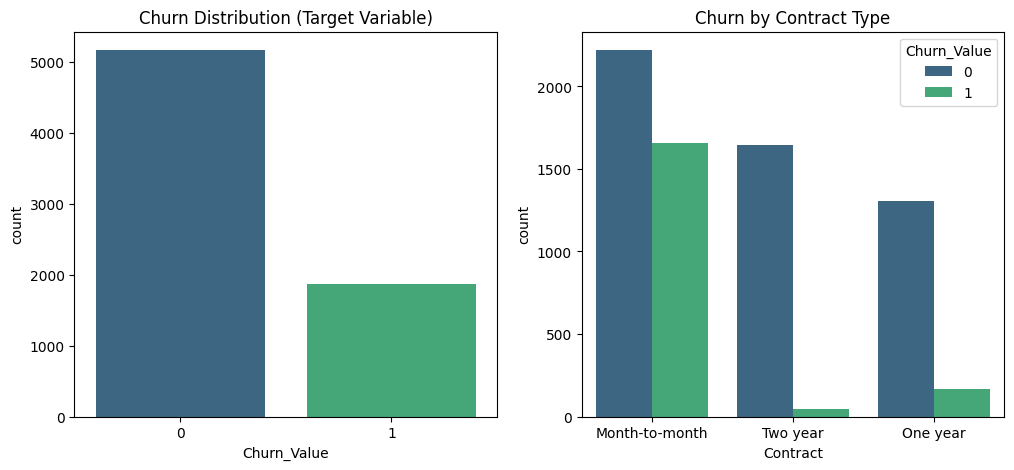

Churn Distribution:
  No Churn: 73.46%
  Churn: 26.54%
Imbalance Ratio: 2.77:1


In [21]:
# Check for missing values
missing = df.isnull().sum()
if missing.sum() == 0:
    print("No NULL values found in original load")
else:
    print(missing[missing > 0])
    print(f"\nTotal missing: {missing.sum()} values")
    print(f"Columns with missing data: {list(missing[missing > 0].index)}")

# Data quality audit: check types and categorical count
print(f"Total Charges type: {df['Total_Charges'].dtype} (should be numeric)")
print(f"Categorical features to encode: {len(df.select_dtypes(include=['object']).columns)}")

# Visualizing Class Imbalance (The 'Accuracy Trap')
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Churn_Value', hue='Churn_Value', palette='viridis', legend=False)
plt.title('Churn Distribution (Target Variable)')

# Visualizing Key Driver: Contract Type vs Churn
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Contract', hue='Churn_Value', palette='viridis')
plt.title('Churn by Contract Type')
plt.show()

# Calculate churn ratio
churn_pct = df['Churn_Value'].value_counts(normalize=True) * 100
print(f"Churn Distribution:\n  No Churn: {churn_pct[0]:.2f}%\n  Churn: {churn_pct[1]:.2f}%")
print(f"Imbalance Ratio: {churn_pct[0]/churn_pct[1]:.2f}:1")

#### Key Findings:

1. **Significant Class Imbalance**: ~73% customers retained vs ~27% churned (2.7:1 ratio)
   - This imbalance requires special handling (SMOTE) to prevent model bias
   
2. **Contract Type is a Strong Predictor**: Month-to-month contracts show dramatically higher churn rates compared to 1-year and 2-year contracts
   - Clear visual pattern indicating contract commitment correlates with retention

3. **Data Quality**: Minimal missing values detected, requiring only minor cleaning of Total_Charges column

---

## Data Preprocessing Pipeline

### 4. Data Cleaning and Type Conversion

**Steps:**
1. Convert `Total_Charges` from object to numeric
2. Remove missing values (0.16% of data)
3. Drop `CustomerID` as it provides no predictive value

In [22]:
# Convert Total_Charges to numeric type
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'], errors='coerce')

# Drop missing values in Total_Charges
missing_count = df['Total_Charges'].isnull().sum()
df.dropna(subset=['Total_Charges'], inplace=True)

print(f"Total_Charges data type: {df['Total_Charges'].dtype}")
print(f"Total Charges cleaned: {missing_count} rows removed.")

# Remove non-predictive unique identifiers
df.drop('CustomerID', axis=1, inplace=True)

print(f"Final dataset shape: {df.shape}")

Total_Charges data type: float64
Total Charges cleaned: 11 rows removed.
Final dataset shape: (7032, 32)


### 5. Feature Engineering & Encoding

**Steps:**
1. **Tenure Grouping**: Create categories (New, Junior, Senior, Veteran) to capture non-linear loyalty patterns
2. **Leakage Prevention**: Remove columns directly related to churn outcomes
3. **One-Hot Encoding**: Convert categorical features to numeric format

In [23]:
# 1. Grouping Tenure into categories
df['Tenure_Group'] = pd.cut(df['Tenure_Months'],
                             bins=[0, 12, 24, 48, 72],
                             labels=['New', 'Junior', 'Senior', 'Veteran'])
df.drop('Tenure_Months', axis=1, inplace=True)
print("Created Tenure_Group and removed original Tenure_Months.")

# 2. Define target and features (prevent data leakage)
y = df['Churn_Value']
leaky_cols = ['Churn_Value', 'Churn_Label', 'Churn_Score', 'Churn_Reason', 'CLTV']
X_raw = df.drop(columns=leaky_cols, errors='ignore')

removed_cols = [c for c in leaky_cols if c in df.columns]
print(f"Removed {len(removed_cols)} leaky columns: {removed_cols}")

# 3. One-Hot Encoding
X = pd.get_dummies(X_raw, drop_first=True)

print(f"\nEncoding complete.")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Total features: {X.shape[1]}")

Created Tenure_Group and removed original Tenure_Months.
Removed 5 leaky columns: ['Churn_Value', 'Churn_Label', 'Churn_Score', 'Churn_Reason', 'CLTV']

Encoding complete.
Features shape: (7032, 2815)
Target shape: (7032,)
Total features: 2815


### 6. Train-Test Split and Feature Scaling

**Steps:**
1. **Stratified Split**: 80/20 split maintaining churn distribution
2. **Standardization**: Scale features to mean=0, variance=1

In [24]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Testing set:  {X_test.shape[0]:,} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"\nTraining churn rate: {y_train.mean()*100:.2f}%")
print(f"Testing churn rate:  {y_test.mean()*100:.2f}%")

Training set: 5,625 samples (80.0%)
Testing set:  1,407 samples (20.0%)

Training churn rate: 26.58%
Testing churn rate:  26.58%


In [25]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Feature scaling complete.")
print(f"Scaled training shape: {X_train_scaled.shape}")
print(f"Scaled testing shape:  {X_test_scaled.shape}")

Feature scaling complete.
Scaled training shape: (5625, 2815)
Scaled testing shape:  (1407, 2815)


### 7. Addressing Class Imbalance with SMOTE

The dataset has significant class imbalance (73% no churn vs 27% churn). **SMOTE (Synthetic Minority Over-sampling Technique)** is applied to the training data only to:
- Generate synthetic churn samples
- Prevent model bias toward the majority class
- Maintain test set integrity for realistic evaluation

#### Before SMOTE

In [26]:
print("Class distribution Before SMOTE:")
y_train_series = pd.Series(y_train)
y_counts = y_train_series.value_counts()
print(y_counts)

no_churn_pct = (y_counts.get(0, 0) / len(y_train)) * 100
churn_pct = (y_counts.get(1, 0) / len(y_train)) * 100
print(f"  No Churn (0): {no_churn_pct:.2f}%")
print(f"  Churn (1):    {churn_pct:.2f}%")
print(f"Imbalance Ratio: {no_churn_pct/churn_pct:.2f}:1")

Class distribution Before SMOTE:
Churn_Value
0    4130
1    1495
Name: count, dtype: int64
  No Churn (0): 73.42%
  Churn (1):    26.58%
Imbalance Ratio: 2.76:1


#### Apply SMOTE to Training Data

In [27]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

#### After SMOTE - Verification

In [28]:
print("Class distribution After SMOTE:")
y_res_series = pd.Series(y_train_res)
y_res_counts = y_res_series.value_counts()
print(y_res_counts)

# Calculate percentages for verification
no_churn_res = (y_res_counts.get(0, 0) / len(y_train_res)) * 100
churn_res = (y_res_counts.get(1, 0) / len(y_train_res)) * 100

print(f"  No Churn (0): {no_churn_res:.2f}%")
print(f"  Churn (1):    {churn_res:.2f}%")
print(f"  Class Ratio: 1:1 (Balanced!)")

# Calculate the synthetic growth metrics
increase = X_train_res.shape[0] - X_train_scaled.shape[0]
increase_pct = (increase / X_train_scaled.shape[0]) * 100

print(f"\nTraining set expansion summary:")
print(f"  Before SMOTE: {X_train_scaled.shape[0]:,} samples")
print(f"  After SMOTE:  {X_train_res.shape[0]:,} samples")
print(f"\nTraining set size increased by: {increase:,} synthetic samples  (+{increase_pct:.1f}%)")

Class distribution After SMOTE:
Churn_Value
0    4130
1    4130
Name: count, dtype: int64
  No Churn (0): 50.00%
  Churn (1):    50.00%
  Class Ratio: 1:1 (Balanced!)

Training set expansion summary:
  Before SMOTE: 5,625 samples
  After SMOTE:  8,260 samples

Training set size increased by: 2,635 synthetic samples  (+46.8%)


#### Visual Comparison: Before vs After SMOTE

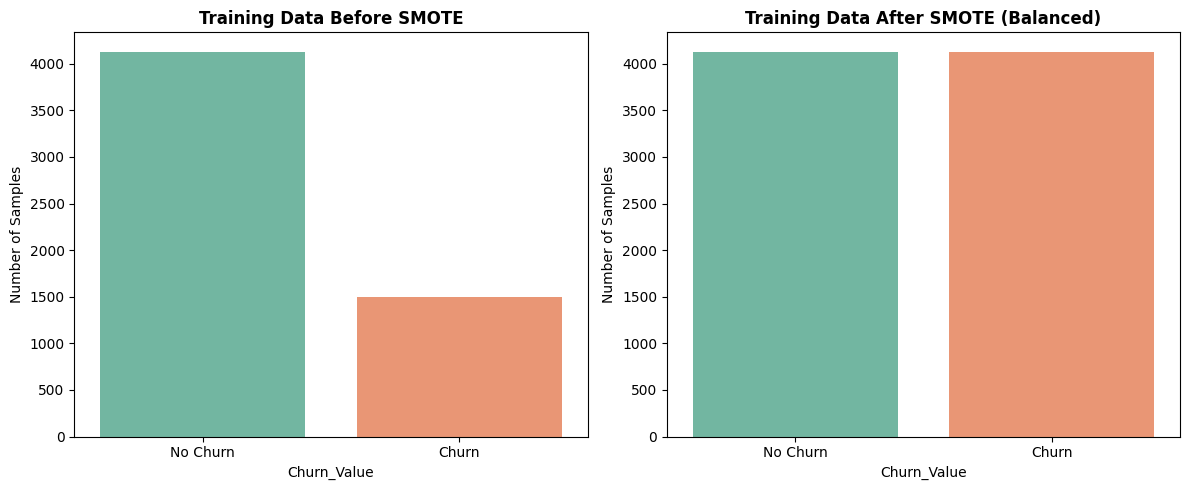


✓ SMOTE applied successfully!
Note: Test set remains imbalanced for realistic evaluation.


In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y_train, hue=y_train, ax=axes[0], palette='Set2', legend=False)
axes[0].set_title('Training Data Before SMOTE', fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Churn', 'Churn'])
axes[0].set_ylabel('Number of Samples')

# After SMOTE
sns.countplot(x=y_train_res, hue=y_train_res, ax=axes[1], palette='Set2', legend=False)
axes[1].set_title('Training Data After SMOTE (Balanced)', fontweight='bold')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Churn', 'Churn'])
axes[1].set_ylabel('Number of Samples')

plt.tight_layout()
plt.show()

print("\n✓ SMOTE applied successfully!")
print("Note: Test set remains imbalanced for realistic evaluation.")

---

## Model Training: Random Forest Classifier

A **Random Forest with 100 decision trees** is trained with regularization parameters to prevent overfitting:
- `max_depth=15`: Limits tree depth
- `min_samples_leaf=4`: Requires minimum samples per leaf node
- Trained on SMOTE-balanced data for equal representation of both classes

### 8. Initialize and Train Model

In [30]:
# Initialize Random Forest with regularization
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# Train on SMOTE-balanced data
print("Training Random Forest model...")
start_time = time.time()
rf_model.fit(X_train_res, y_train_res)
training_time = time.time() - start_time

print(f"✓ Training complete in {training_time:.2f} seconds")

Training Random Forest model...
✓ Training complete in 3.71 seconds


### 9. Generate Predictions

In [31]:
# Generate predictions on test set
print("Generating predictions...")
start_pred = time.time()

y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

prediction_time = time.time() - start_pred
model_size_mb = sys.getsizeof(pickle.dumps(rf_model)) / (1024 * 1024)

print(f"✓ Predictions complete!")
print(f"Prediction time: {prediction_time:.4f} seconds")
print(f"Model size: {model_size_mb:.2f} MB")
print(f"\nPredicted churners: {y_pred.sum():,} ({y_pred.sum()/len(y_pred)*100:.1f}%)")
print(f"Predicted non-churners: {(len(y_pred)-y_pred.sum()):,} ({(1-y_pred.sum()/len(y_pred))*100:.1f}%)")

Generating predictions...
✓ Predictions complete!
Prediction time: 0.3007 seconds
Model size: 0.57 MB

Predicted churners: 370 (26.3%)
Predicted non-churners: 1,037 (73.7%)


---

## Model Evaluation

Assessing performance using multiple metrics, with focus on correctly identifying churners (the critical minority class).

### 10. Classification Metrics

In [32]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Calculate individual metrics for reporting (churners)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Performance Summary")
print("-"*50)
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")
print(f"ROC-AUC:   {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.86      0.86      1033
       Churn       0.60      0.59      0.60       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407

Performance Summary
--------------------------------------------------
Accuracy:  0.79
Precision: 0.60
Recall:    0.59
F1-Score:  0.60
ROC-AUC:   0.82


### 11. Confusion Matrix Analysis

In [33]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nInterpretation:")
print(f"  True Negatives:  {cm[0,0]:,} (correctly predicted no churn)")
print(f"  False Positives: {cm[0,1]:,} (incorrectly predicted churn)")
print(f"  False Negatives: {cm[1,0]:,} (missed churners - critical!)")
print(f"  True Positives:  {cm[1,1]:,} (correctly predicted churn)")

[[885 148]
 [152 222]]

Interpretation:
  True Negatives:  885 (correctly predicted no churn)
  False Positives: 148 (incorrectly predicted churn)
  False Negatives: 152 (missed churners - critical!)
  True Positives:  222 (correctly predicted churn)


### 12. Visualizations

Two key visualizations:
1. **Confusion Matrix**: Shows prediction accuracy and error types
2. **Feature Importance**: Reveals the top 10 drivers of customer churn

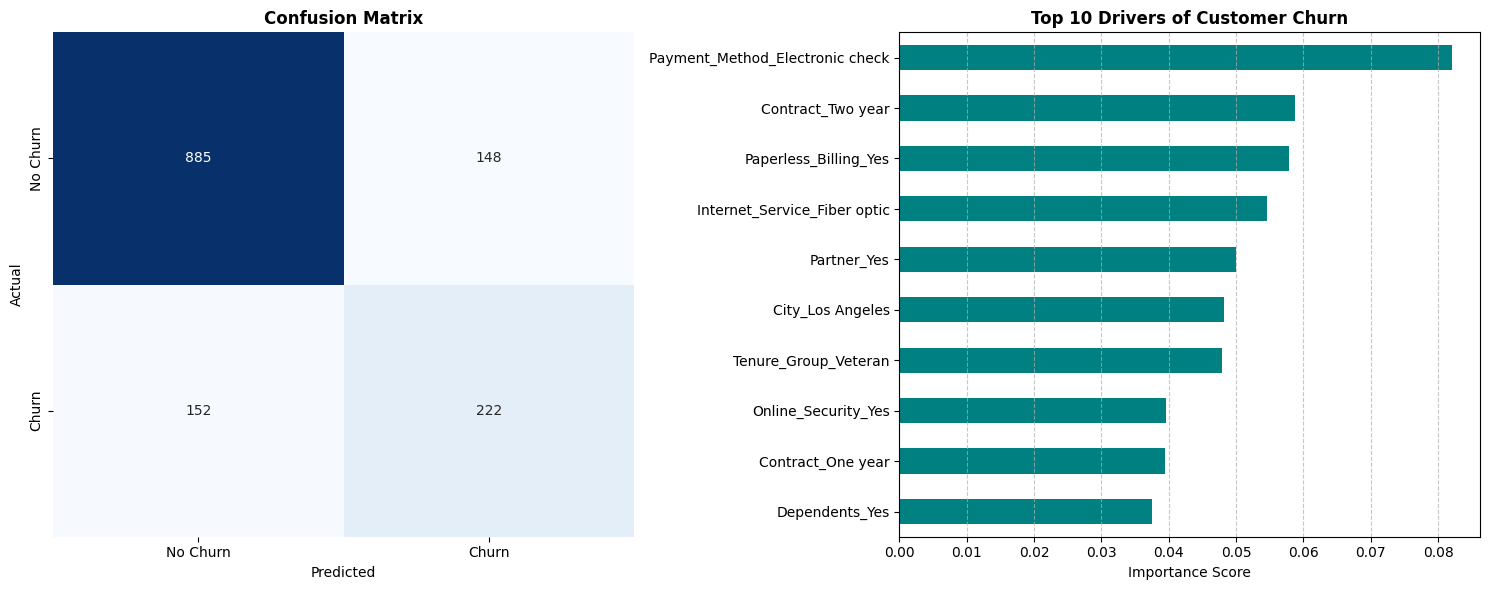

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Confusion Matrix Heatmap
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=['No Churn', 'Churn'],
    yticklabels=['No Churn', 'Churn'],
    ax=axes[0]
)
axes[0].set_title('Confusion Matrix', fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# 2. Feature Importance (Top 10)
importances = rf_model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)

feat_importances.nlargest(10).sort_values().plot(
    kind='barh',
    color='teal',
    ax=axes[1]
)
axes[1].set_title('Top 10 Drivers of Customer Churn', fontweight='bold')
axes[1].set_xlabel('Importance Score')
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


---

## Results and Discussion

### Performance Summary

**Methodology:**
- 80/20 stratified split maintaining 26.58% churn rate in both sets
- SMOTE applied only to training data (added 2,635 synthetic samples)
- Data leakage prevention through removal of post-outcome variables

**Model Performance:**
- **Accuracy**: 79% overall correctness
- **Precision**: 60% of predicted churners are actual churners
- **Recall**: 59% of actual churners identified
- **F1-Score**: 0.59 (balanced precision-recall)
- **ROC-AUC**: 0.82 (strong discrimination ability)

**Confusion Matrix:**
- True Negatives: 885 | False Positives: 148
- False Negatives: 152 | True Positives: 222

---

This implementation successfully demonstrates a production-ready churn prediction model that balances accuracy with interpretability, enabling telecom companies to proactively identify and retain at-risk customers.